<a href="https://colab.research.google.com/github/Boddupallivarshitha/BharatIntern/blob/main/irisclassifer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install scikit-learn==1.3.0

In [3]:
df = pd.read_csv("/content/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

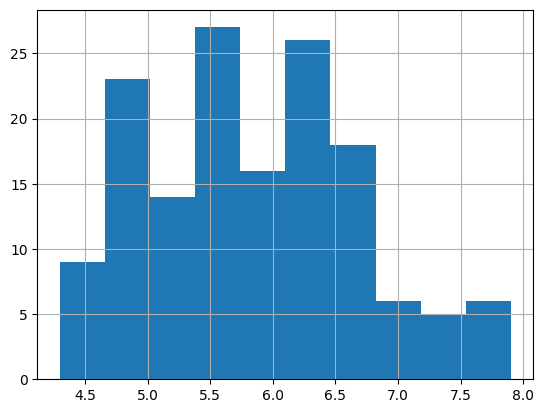

In [8]:
df['sepal_length'].hist()

<Axes: >

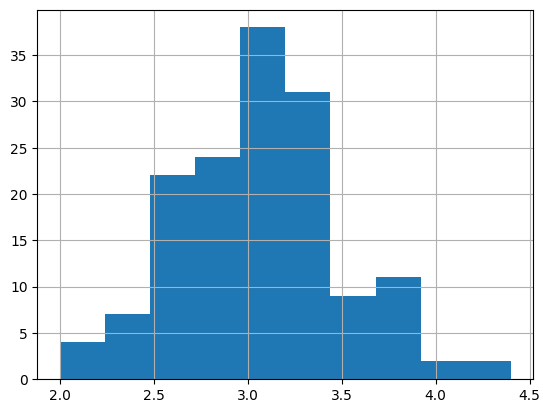

In [9]:
df['sepal_width'].hist()

<Axes: >

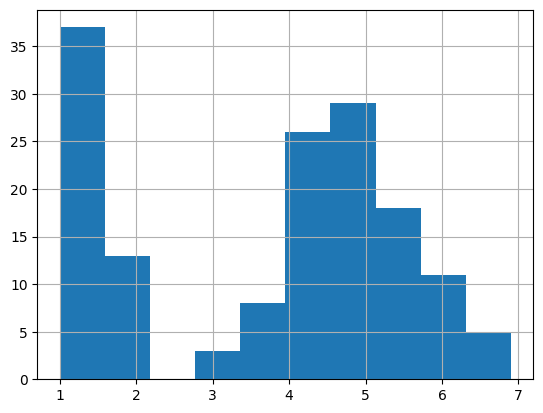

In [10]:
df['petal_length'].hist()

<Axes: >

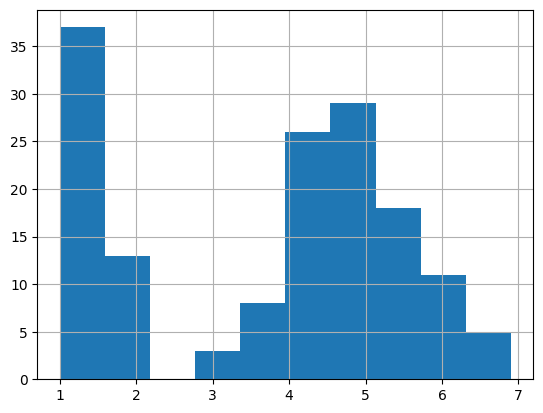

In [11]:
df['petal_length'].hist()

<Axes: >

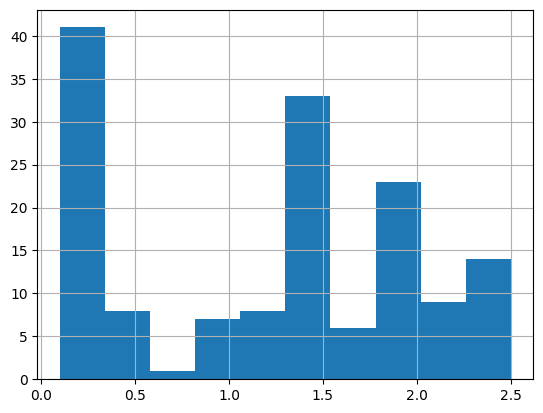

In [12]:
df['petal_width'].hist()

In [13]:
colors = ['red','orange','blue']
species=['virginica','versicolor','setosa']

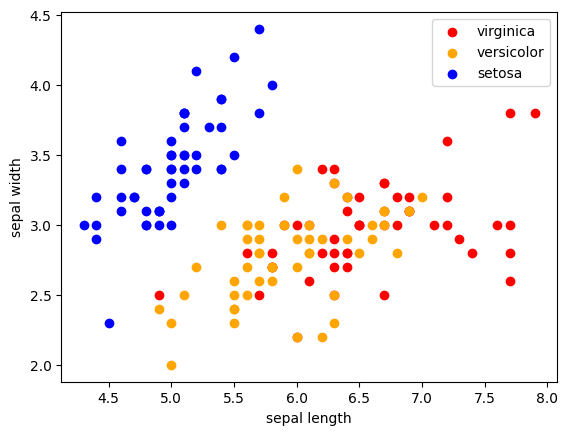

In [14]:
for i in range(3):
    x=df[df['species']== species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c = colors[i],label=species[i])
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()

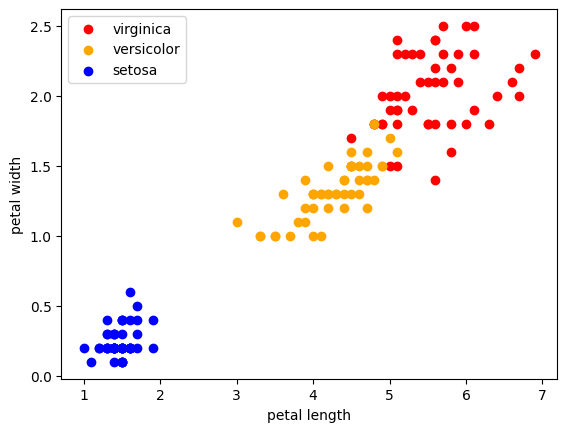

In [15]:
for i in range(3):
    x=df[df['species']== species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c = colors[i],label=species[i])
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend()

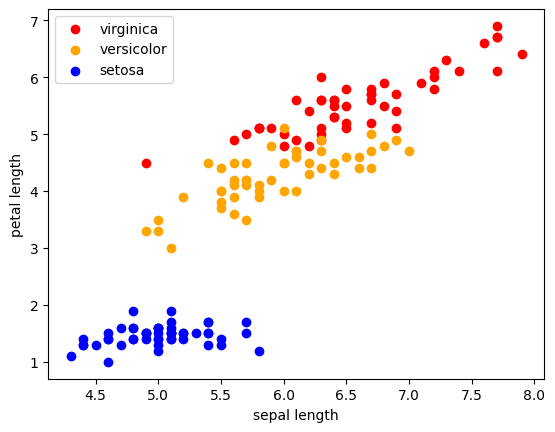

In [16]:
for i in range(3):
    x=df[df['species']== species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'],c = colors[i],label=species[i])
plt.xlabel("sepal length")
plt.ylabel("petal length")
plt.legend()

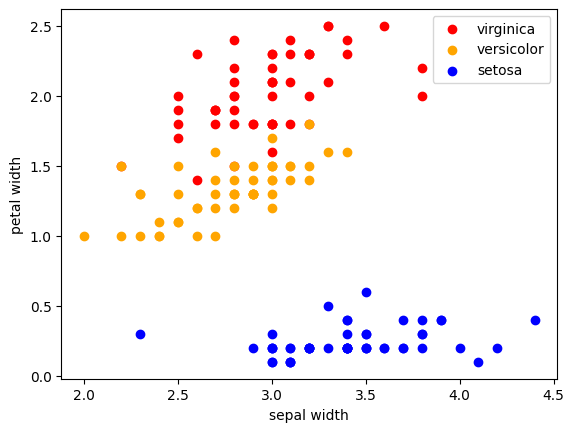

In [17]:
for i in range(3):
    x=df[df['species']== species[i]]
    plt.scatter(x['sepal_width'],x['petal_width'],c = colors[i],label=species[i])
plt.xlabel("sepal width")
plt.ylabel("petal width")
plt.legend()

In [18]:
df.drop('species', axis=1).corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: >

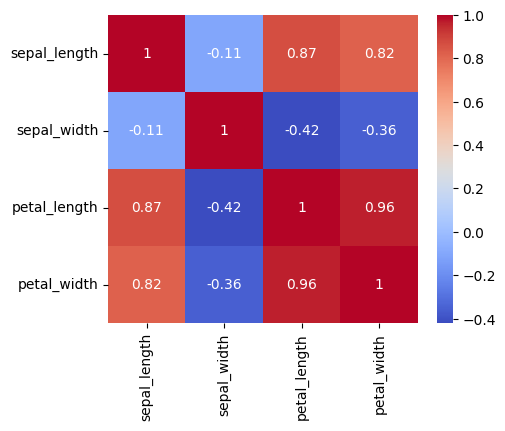

In [19]:
corr = df.drop('species', axis=1).corr()  # Exclude 'species' column
fig = plt.figure(figsize=(5, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle
x=df.drop (columns=['species'])
y=df['species']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)


In [24]:
model = LogisticRegression()
model.fit(x_train, y_train)
print("Logistic Regression Accuracy: ",model.score(x_test, y_test)*100)

Logistic Regression Accuracy:  95.55555555555556


In [23]:
model.fit(x_train.values, y_train.values)

LogisticRegression()

In [25]:
print("Accuracy:", model.score(x_test.values, y_test.values)*100)

Accuracy: 95.55555555555556


In [26]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)
print("KNN Accuracy: ",model.score(x_test, y_test)*100)

KNN Accuracy:  100.0


In [27]:
model.fit(x_train.values, y_train.values)

KNeighborsClassifier()

In [28]:
print("Accuracy:",model.score(x_test.values, y_test.values)*100)

Accuracy: 100.0


In [30]:
import pickle
filename ='irisclassifier.ipynb'
pickle.dump(model,open(filename,'wb'))

In [31]:
import pickle
load_model = pickle.load(open('irisclassifier.ipynb','rb'))

In [32]:
load_model.predict([[4,3,1,5]])

array(['setosa'], dtype=object)